# MEAN SHIFT

# Setup
Let us import the required modules.

In [1]:
from src.utilities.dataset import load_data
from src.models.clustering import MeanShiftEvaluation
# from src.models.dataset import DataClusterSplit

## Load Data


In [2]:
data = load_data(reduced=True)
data

Loading /Users/a/GitHub/clustering/src/data/red_x_pixels.csv
Loading /Users/a/GitHub/clustering/src/data/red_y_labels.csv


[Length: 14000; Features: 784]

## Tuning

In [3]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[25, 50],
    hyperparam_vals=[0.4, 0.6]
    # n_components=[2, 5, 10, 15, 25, 50, 100, 150, 200],
    # hyperparam_vals=[0.1, 0.3, 0.5, 0.7, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0]
)

In [4]:
mean_shift_evaluation.load_results()

Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result.json
Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result_bestmodels.json
Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_bestmodel.pkl


In [14]:
%%time
mean_shift_evaluation.evaluate()

  0%|          | 0/2 [00:00<?, ?it/s]

Processing PCA dimension: 25


  0%|          | 0/2 [00:00<?, ?it/s]

PCA dimension: 25 - bandwidth value: 0.4
PCA dimension: 25 - bandwidth value: 0.6

Processing PCA dimension: 50


  0%|          | 0/2 [00:00<?, ?it/s]

PCA dimension: 50 - bandwidth value: 0.4
PCA dimension: 50 - bandwidth value: 0.6

Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result.json
Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result_bestmodels.json
Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_bestmodel.pkl
CPU times: user 1min 48s, sys: 7.87 s, total: 1min 55s
Wall time: 11min 3s


In [5]:
mean_shift_evaluation.results()

{2: {0.2: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 169.8015768769983},
  0.5: {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 23.64683932501066}},
 50: {0.2: {'score': 0.8997668813078485,
   'n_clusters': 13374,
   'time': 57.97351431399875},
  0.5: {'score': 0.9025269458022512,
   'n_clusters': 9696,
   'time': 124.92843449099746}}}

In [6]:
mean_shift_evaluation.results_bestmodels()

{2: {'bandwidth': 0.2,
  'score': 0.10026692722949598,
  'n_clusters': 1,
  'time': 169.8015768769983},
 50: {'bandwidth': 0.5,
  'score': 0.9025269458022512,
  'n_clusters': 9696,
  'time': 124.92843449099746}}

In [7]:
mean_shift_evaluation.best_model()

{'n_components': 50,
 'bandwidth': 0.5,
 'score': 0.9025269458022512,
 'n_clusters': 9696,
 'time': 124.92843449099746}

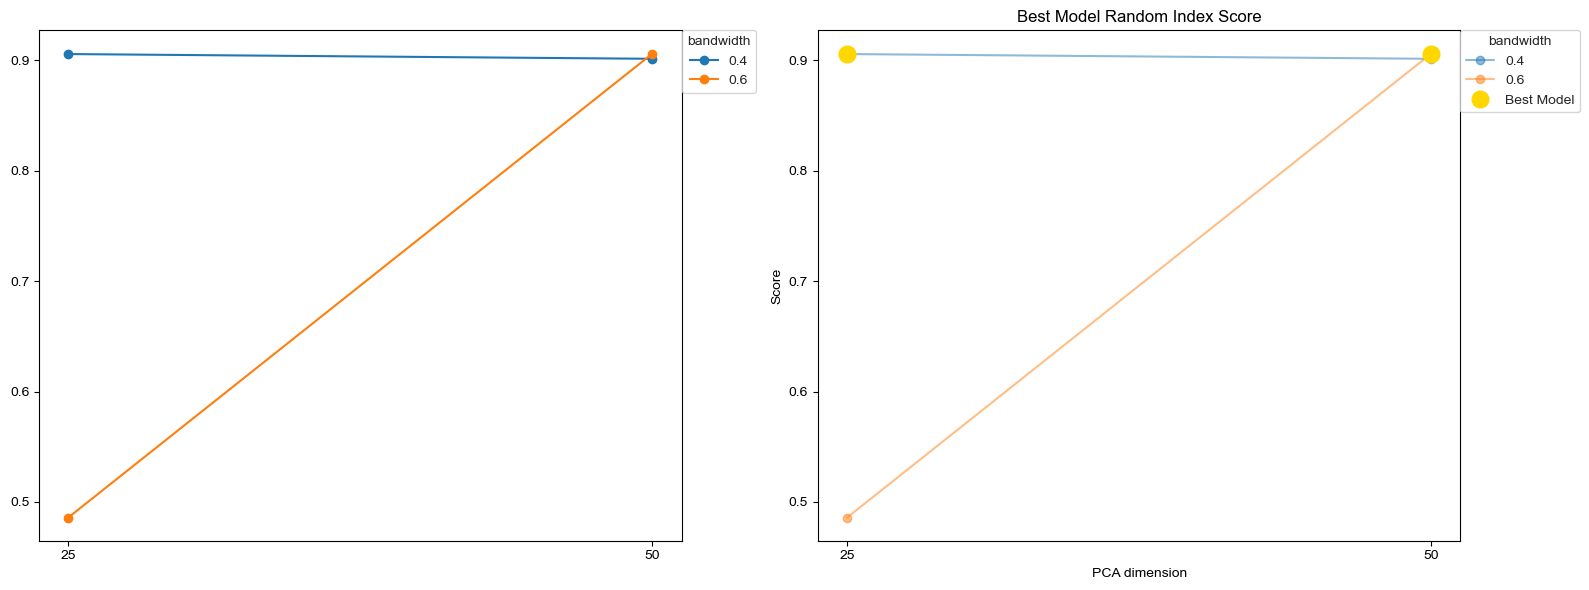

In [5]:
mean_shift_evaluation.plot_score_with_highlight(save=True)

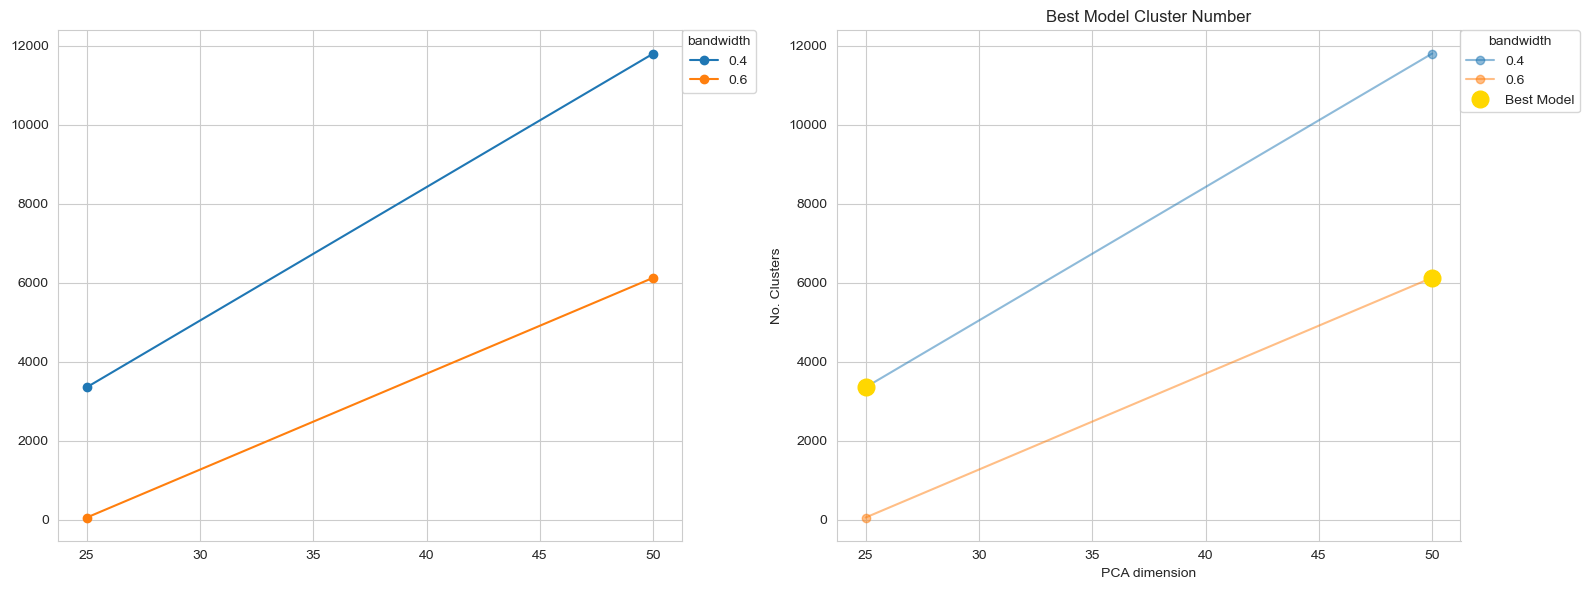

In [16]:
mean_shift_evaluation.plot_n_clusters_with_highlight(save=True)

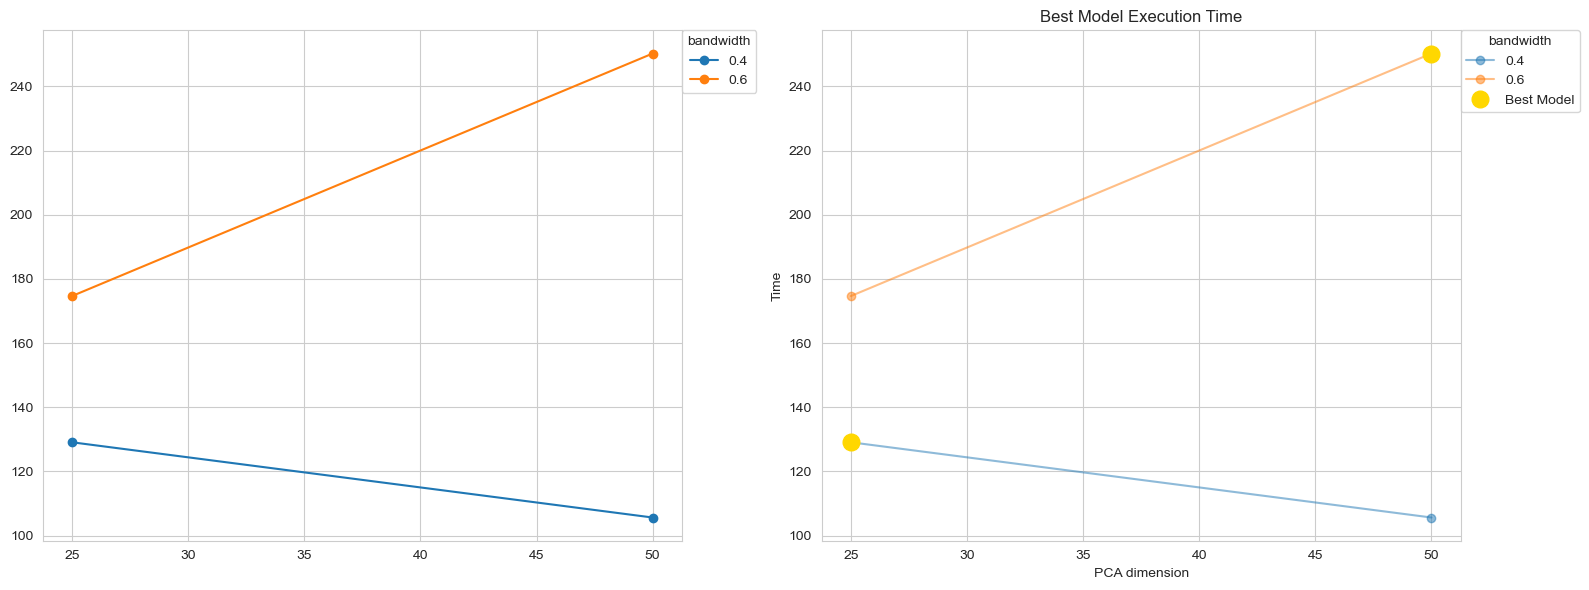

In [17]:
mean_shift_evaluation.plot_time_with_highlight(save=True)

In [5]:
mean_shift_evaluation.best_model()

{'model': MeanShift(bandwidth=0.6, n_jobs=-1),
 'n_components': 50,
 'bandwidth': 0.6,
 'score': 0.9060851999632626,
 'n_clusters': 6130,
 'time': 250.2511888059962}

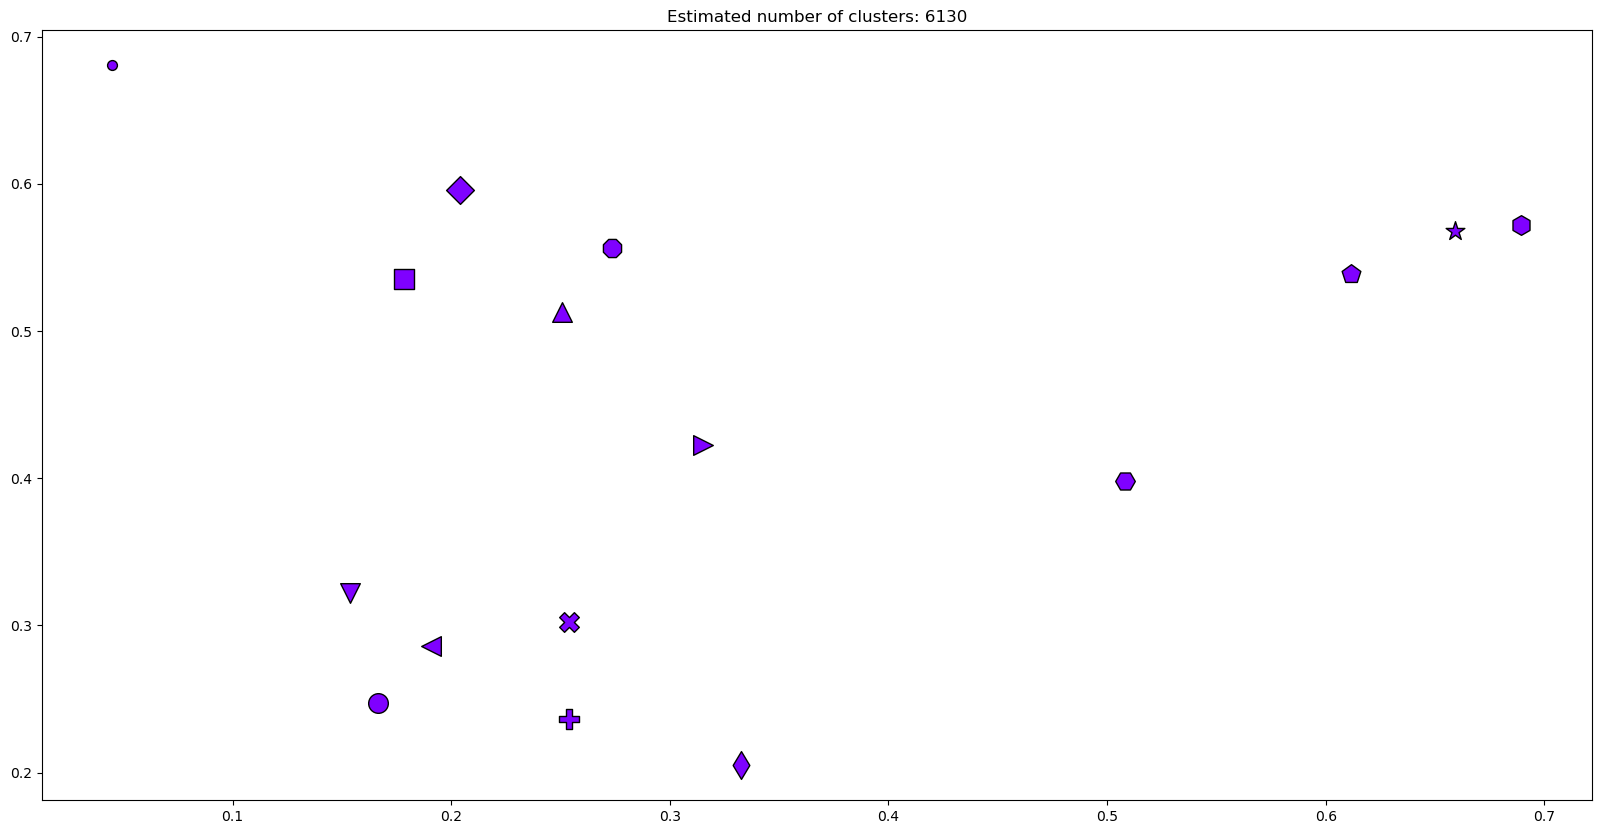

In [6]:
mean_shift_evaluation.plot_clusters()

## Best model

In [4]:
best = mean_shift_evaluation.best_model
best

MeanShift[N-rows: 14000; N-components: 50; Score: 0.9062438031287949, N-clusters: 6054] [KernelSize: 0.6] 

In [5]:
from assignment_3.clustering.model.model import DataClusterSplit

In [6]:
clusters = DataClusterSplit(data=data, index=best.out)

In [7]:
clusters

ClusterDataSplit [Data: 14000, Clusters: 6054, Mean-per-Cluster: 2.313, Score: 0.906] 

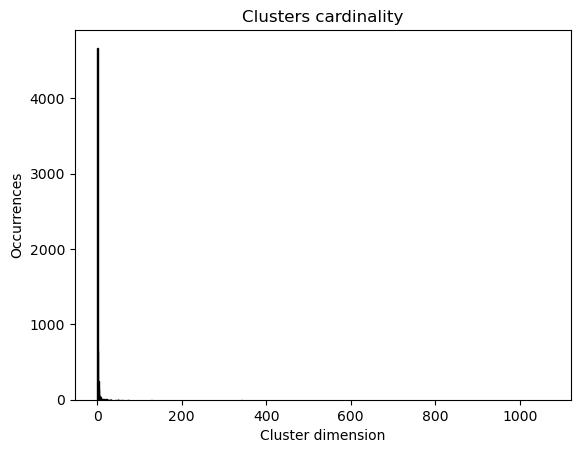

In [8]:
clusters.plot_frequencies_histo()

In [9]:
clusters_best = clusters.get_sub_clusters(a=25)

In [10]:
clusters_best

ClusterDataSplit [Data: 4187, Clusters: 49, Mean-per-Cluster: 85.449, Score: 0.887] 

In [11]:
clusters_best.rand_index_score

0.8868416347051045

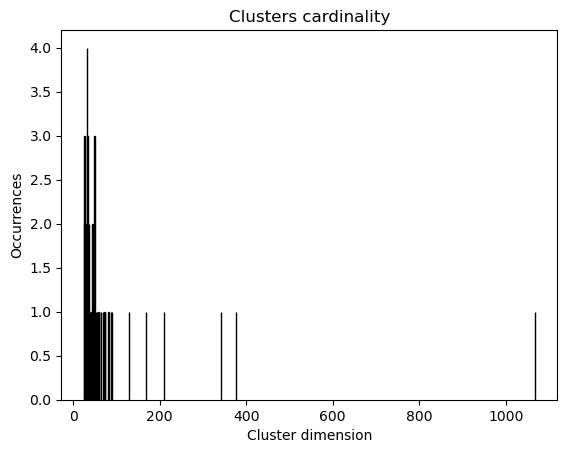

In [12]:
clusters_best.plot_frequencies_histo()

In [ ]:
clusters_best.plot_mean_digit()
# output stra lunghi porcodio

In [14]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [15]:
clusters_bad

ClusterDataSplit [Data: 4669, Clusters: 4669, Mean-per-Cluster: 1.000, Score: 0.854] 

In [ ]:
clusters_bad.plot_mean_digit(sample_out=500)
# output stra lunghi porcodio